# Hotel Business Analytics

### Import Library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [25]:
df = pd.read_csv('/home/dasxgo/dev/eda/data/hotel_bookings.csv', encoding = 'unicode_escape')

### Data Cleaning

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [27]:
df.shape

(119390, 32)

In [28]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
import datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [31]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [32]:
for i in (df.describe(include='object')):
                      print(i)
                      print(df[i].unique())
                      print('----'*64)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' '

In [33]:
pd.isnull(df).sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [34]:
df.drop(['agent', 'company'], axis = 1, inplace = True)

In [35]:
df.dropna(subset = ['children'], inplace = True)

In [36]:
df.dropna(subset = ['country'], inplace = True)

In [37]:
pd.isnull(df).sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [38]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [39]:
df = df[df['adr'] < 5000]

In [40]:
df = df[df['adr']>0]

In [41]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958
mean,0.375767,105.376879,2016.161443,27.138109,15.805050,0.937687,2.522974,1.862438,0.104824,0.007866,0.027959,0.086963,0.119795,0.216505,2.347373,103.649070,0.061997,0.571273,2016-07-31 01:23:52.206432768
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,709.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.484322,106.944356,0.706509,13.561162,8.783049,0.993329,1.885574,0.481129,0.400296,0.097102,0.164855,0.850186,1.432435,0.633569,17.712061,46.646454,0.244426,0.791495,NaN


### Data Analysis and Visualization


In [42]:
df['is_canceled']

2         0
3         0
4         0
5         0
6         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 116958, dtype: int64

In [43]:
m=0
n=0
for i in df['is_canceled']:
    if i == 0:
        m = m + 1
    elif i == 1:
        n = n + 1
print(m,n)
print('Not Cancelation %: ', m/(m+n)*100, '%')
print('Cancelation %: ', n/(m+n)*100, '%')



73009 43949
Not Cancelation %:  62.423263051693766 %
Cancelation %:  37.57673694830623 %


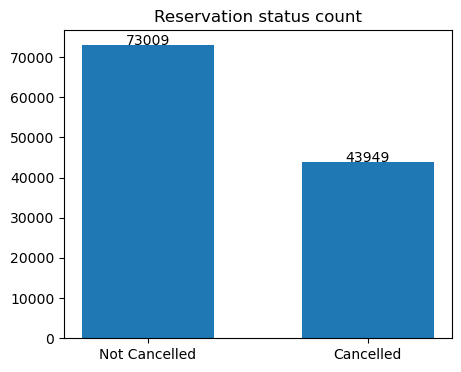

In [44]:
x = ['Not Cancelled', 'Cancelled']
y = [m,n]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

plt.figure(figsize= (5,4))
plt.bar(x,y,width = 0.6)
addlabels(x,y)
plt.title('Reservation status count')
plt.show()


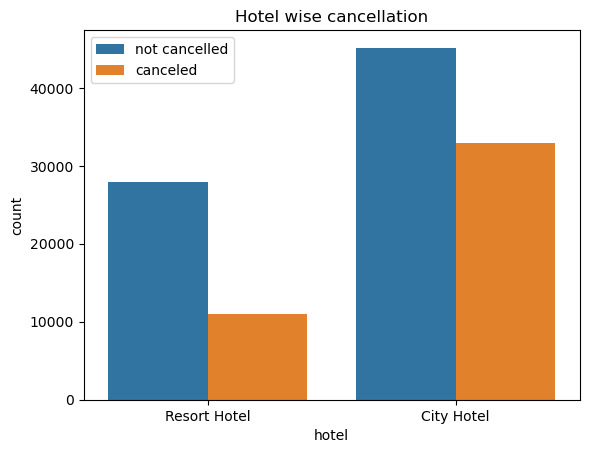

In [45]:
sns.countplot(x='hotel', hue = 'is_canceled', data=df)
plt.legend(['not cancelled', 'canceled'])
plt.title('Hotel wise cancellation')
plt.show()

In [46]:
Resort_hotel = df[df['hotel']=='Resort Hotel']
Resort_hotel['is_canceled'].value_counts()

is_canceled
0    27862
1    10995
Name: count, dtype: int64

In [47]:
City_hotel = df[df['hotel'] == 'City Hotel']
City_hotel['is_canceled'].value_counts()

is_canceled
0    45147
1    32954
Name: count, dtype: int64

In [48]:
Resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.717039
1    0.282961
Name: proportion, dtype: float64

#### Resort Hotel cancellation % is around 29 %

In [49]:
City_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.578059
1    0.421941
Name: proportion, dtype: float64

#### Resort Hotel cancellation % is around 42 %

In [50]:
Resort_hotel['adr'].describe()

count    38857.000000
mean        97.161082
std         60.641131
min          0.260000
25%         52.400000
50%         77.500000
75%        127.000000
max        508.000000
Name: adr, dtype: float64

In [51]:
City_hotel['adr'].describe()

count    78101.000000
mean       106.876989
std         37.383940
min          0.500000
25%         80.000000
50%        100.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

Max & Min price of both the hotels is almost equal and mean price is also almost equal.

In [52]:
x = df.groupby(['is_canceled'])
y= x['adr'].describe()
print(y)

               count        mean        std   min   25%   50%     75%    max
is_canceled                                                                 
0            73009.0  102.593502  47.193325  0.26  70.0  94.5  126.00  510.0
1            43949.0  105.402601  45.670160  0.50  73.8  96.4  127.93  450.0


Overall Mean price was high when cancellation done.

In [60]:
x = City_hotel.groupby(['is_canceled'])
y = x['adr'].describe()
print(y)

               count        mean        std  min    25%    50%    75%    max
is_canceled                                                                 
0            45147.0  108.274054  37.600913  1.0  80.75  100.2  126.9  510.0
1            32954.0  104.963010  36.999653  0.5  76.93  100.0  125.8  352.5


In [61]:
x = Resort_hotel.groupby(['is_canceled'])
y = x['adr'].describe()
print(y)

               count        mean        std   min     25%    50%     75%  \
is_canceled                                                                
0            27862.0   93.388857  58.380442  0.26  50.050  74.25  120.00   
1            10995.0  106.720132  65.054706  4.00  57.265  84.00  146.05   

               max  
is_canceled         
0            508.0  
1            450.0  


It is found that Cancellation occured when overall mean price was high. 
But no such relation 
found when we compared hotel wise mean price.

<Axes: xlabel='reservation_status_date', ylabel='adr'>

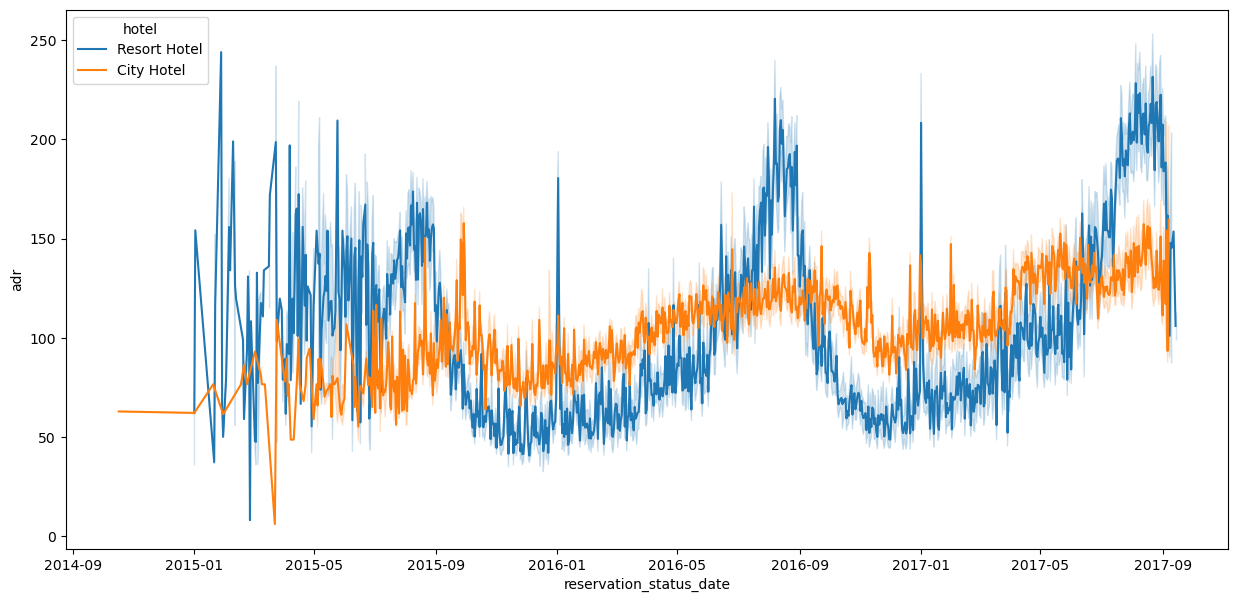

In [62]:
plt.figure(figsize= (15,7))
sns.lineplot(x = 'reservation_status_date', y='adr', hue='hotel', data = df)

In [56]:
plt.show()

### Resort Hotel Price Fluctation is too much

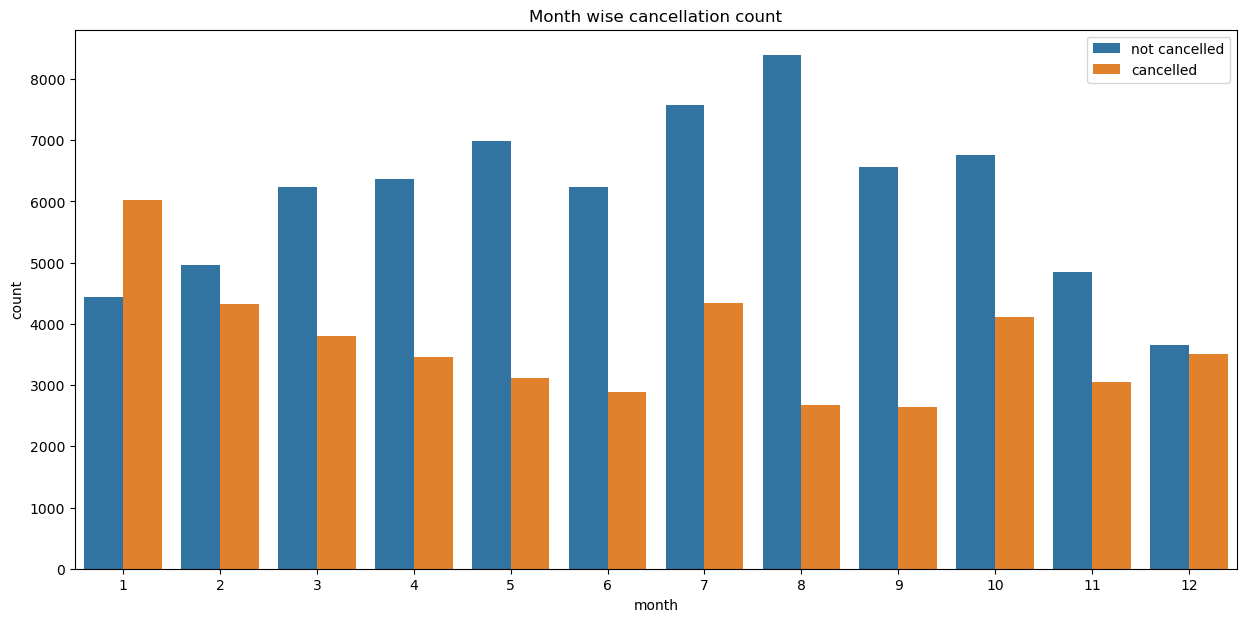

In [65]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(15,7))
sns.countplot(x='month', hue='is_canceled', data = df)
plt.legend(['not cancelled', 'cancelled'])
plt.title('Month wise cancellation count')
plt.show()

As per above chart it is clear that the cancellation in January month was highest and in August 
month was lowest.

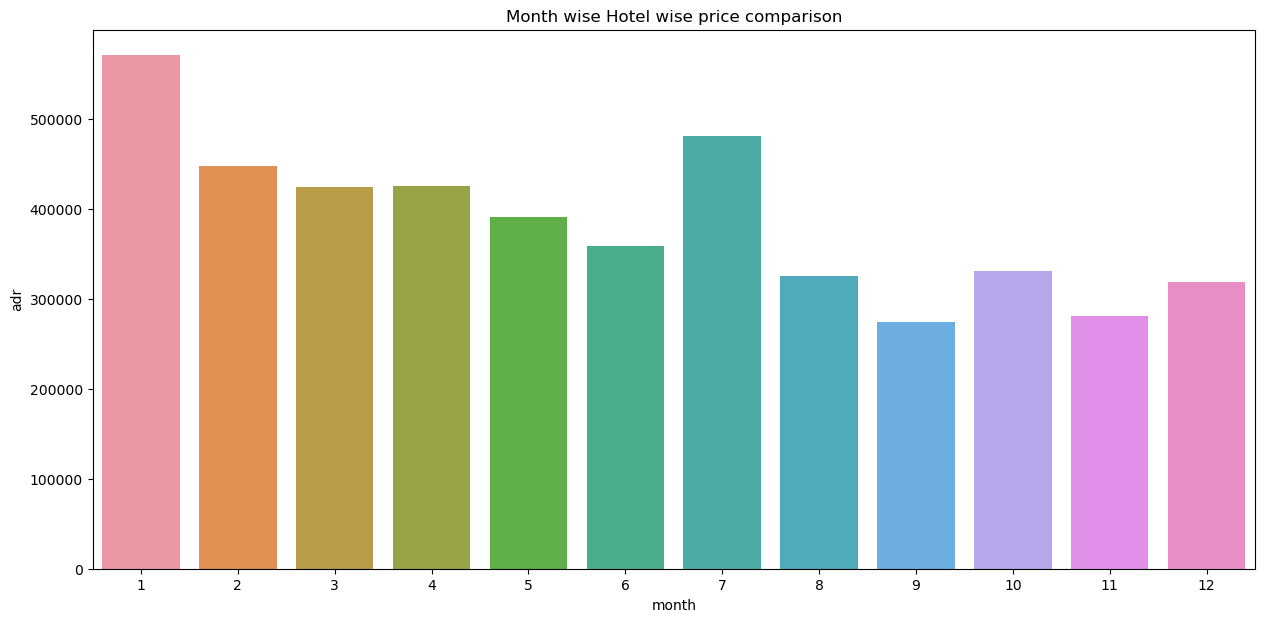

In [68]:
plt.figure(figsize=(15,7))
sns.barplot(x='month', y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.title('Month wise Hotel wise price comparison')
plt.show()

As per above graph it is clear that the price of hotels in january was highest as
compare to other months.

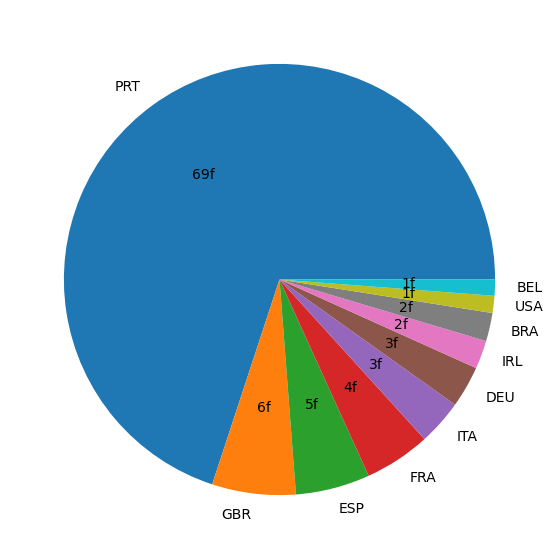

In [70]:
df1 = df[df['is_canceled']==1]
df2 = df1['country'].value_counts()[:10]
plt.figure(figsize=(7,7))
plt.pie(df2,autopct='%.if', labels=df2.index)
plt.show()

As per above pie chart it is clear that the cancellation rate in Portugal is highest.

In [72]:
df3=df['market_segment'].value_counts()
df3

market_segment
Online TA        56036
Offline TA/TO    23829
Groups           19554
Direct           12210
Corporate         5035
Aviation           231
Complementary       63
Name: count, dtype: int64

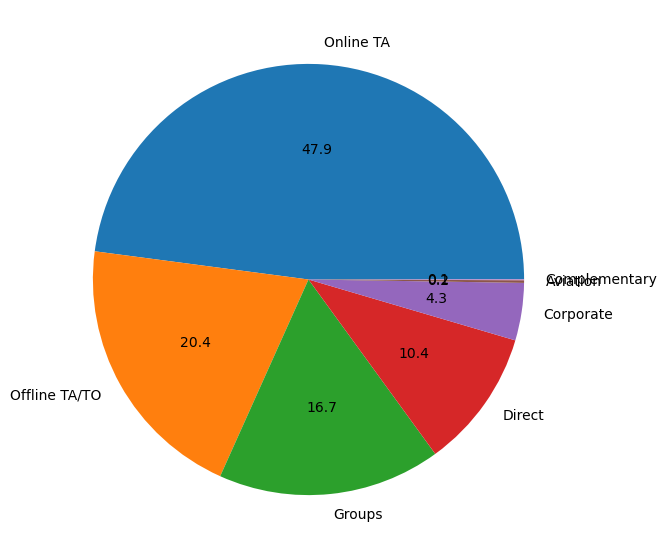

In [74]:
plt.figure(figsize=(7,7))
plt.pie(df3, autopct='%.1f', labels=df3.index)
plt.show()

Mostly people are booking their hotels through online travel agency.

In [76]:
df4 = df1['market_segment'].value_counts()
df4

market_segment
Online TA        20718
Groups           12073
Offline TA/TO     8239
Direct            1889
Corporate          974
Aviation            51
Complementary        5
Name: count, dtype: int64

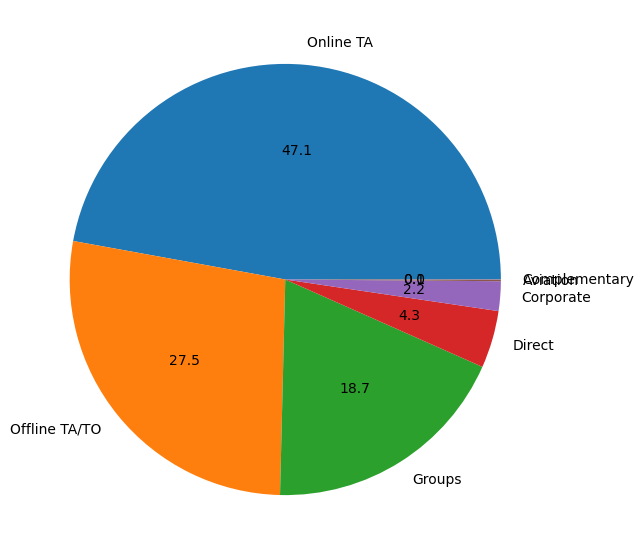

In [77]:
plt.figure(figsize=(7,7))
plt.pie(df4, autopct='%.1f', labels=df3.index)
plt.show()

47% people doing cancellation are from Online Travel Agency segment.

### Findings

#### As per my analysis:
1. Total cancelled Bookings: 43949 and Total Non cancelled Bookings: 73009.
2. City Hotels cancellation % was higher (42% approx) as compare to Resort Hotels cancellation % (28% approx).
3. Overall mean price of hotels was high when cancellation done.
4. In January month, cancellation rate was highest and Hotels prices were also at their peak in january month.
5. In Portugal country, cancellation rate was highest (70%) as compare to other countries
6. Online travel agency booking and cancellation rate both were highest.

### Suggestions:

1. Need more focus on City Hotels. Provide better services in City Hotels.
2. Try to provide best in lowest prices.
3. Main focus required on Portugal country's hotels.
4. Give the customer what you are showing him online.